In [56]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importing Data
train_data = pd.read_excel("Data_Train.xlsx")

In [24]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
# Finding NULL Values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [26]:
# Removing NULL Values
train_data.dropna(inplace=True)

In [27]:
# Checking NULL Values again
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [28]:
# Finding data type of columns
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [29]:
# Converting date to time object
def convertTime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    convertTime(i)

In [30]:
# Checking data type of columns
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [31]:
# Storing day & month in different columns
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data.drop('Date_of_Journey', axis=1, inplace=True)
train_data.drop('Additional_Info', axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-09-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-02 05:50:00,2021-09-02 13:15:00,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-02 18:05:00,2021-09-02 23:30:00,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-02 16:50:00,2021-09-02 21:35:00,4h 45m,1 stop,13302,3,1


In [32]:
# Extracting departure & arrival time
for i in ["Dep_Time", "Arrival_Time"]:
    train_data[i+"_hour"]=train_data[i].dt.hour
    train_data[i+"_minute"]=train_data[i].dt.minute
    train_data.drop(i, axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,16,50,21,35


In [33]:
# Refactoring Duration Column
duration__ = list(train_data["Duration"])
for i, item in enumerate(duration__):
    if len(item.split(" "))!=2:
        if 'h' in item:
            duration__[i] = item + " 0m"
        else:
            duration__[i] = "0h " + item
train_data["Duration"] = duration__

In [34]:
# Extracting Duration Column
train_data["Duration_hours"] = train_data["Duration"].apply(lambda x: x.split(" ")[0][:-1])
train_data["Duration_mins"] = train_data["Duration"].apply(lambda x: x.split(" ")[1][:-1])
train_data.drop("Duration", axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,3,1,16,50,21,35,4,45


In [37]:
# Changing data types of duration columns
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [39]:
# Finding Categorical & Continuous columns
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'O']

In [44]:
# Making different dataset for categorical & continuous column
categorical_df = train_data[cat_col]
continuous_df = train_data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45


In [50]:
categorical_df.head()

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop


In [48]:
categorical_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

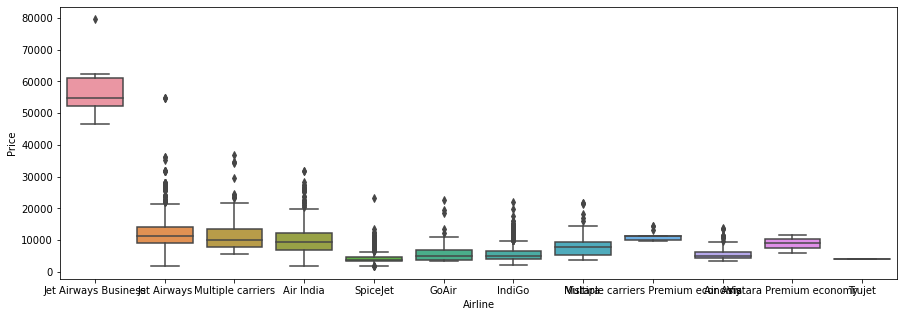

In [58]:
# Plotting Airline v/s Price
plt.figure(figsize=(15,5))
sns.boxplot(y="Price", x='Airline',data=train_data.sort_values('Price',ascending=False))

In [60]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical_df['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
